# Association Rules Project- Exploring Waterside 



In [56]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

https://pbpython.com/pandas_dtypes.html
https://www.weirdgeek.com/2018/11/plotting-stacked-bar-graph/
https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Colors/Color_picker_tool



In [71]:
DF= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/Summary.csv")
DF.columns = ['WE','Total','FOTM']
DF['Difference']=DF['Total'] - DF['FOTM']
DF['FOTM%']=DF['FOTM'] / DF['Total']
DF.head()
DF.describe()
#Below is a snapshot of the data
#Total of 10 Weeks

,Total,FOTM,Difference,FOTM%
count,10.000000,10.000000,10.00000,10.000000
mean,56553.500000,13772.500000,42781.00000,0.243481
std,2190.872594,779.741588,1662.05522,0.008690
min,52431.000000,12399.000000,40032.00000,0.232321
25%,56163.750000,13274.000000,42438.00000,0.236902
50%,56828.000000,13714.000000,42716.00000,0.241773
75%,56966.500000,14282.500000,43338.75000,0.248820
max,60631.000000,15076.000000,46330.00000,0.259100


### Exploring the volume structure of Waterside

24% of volume sold in Waterside is a FOTM product


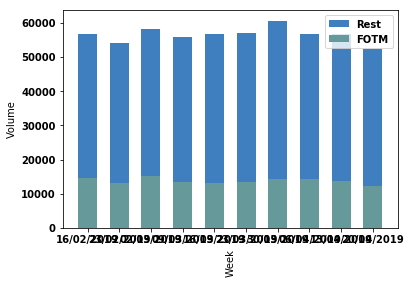

In [118]:
WE = DF['WE']
FOTM = DF['FOTM']
Rest = DF['Difference']
ind = [country for country in countries]
 
plt.bar(ind, Rest, width=0.6, label='Rest', color='#3F7FBF', bottom=FOTM)
plt.bar(ind,FOTM, width=0.6, label='FOTM', color='#669999')
 
plt.xticks(ind, countries)
plt.ylabel("Volume")
plt.xlabel("Week", rotation='vertical')
plt.legend(loc="upper right")
plt.show()

### Reading in 10 weeks of transaction data

In [168]:
DF2= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/WS70.csv")
DF2.columns = ['Date','DOW','TID','Category','Product','Quantity','TID_Items','WE']
DF2.head()


,Date,DOW,TID,Category,Product,Quantity,TID_Items,WE
0,20190417,Wednesday,7425631725,Bakery,4811041,168.0,168,20/04/2019
1,20190315,Friday,7341926957,Confectionery,161072,96.0,99,16/03/2019
2,20190315,Friday,7341926957,Soft Drinks,1011374,1.0,99,16/03/2019
3,20190315,Friday,7341926957,In Store Bakery,124176,2.0,99,16/03/2019
4,20190420,Saturday,7433746269,Reduced Sales,4135973,5.0,74,20/04/2019


In [172]:
DF3= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/Product.csv")
DF3.columns=['ARTICLE','Product']
DF3.head()

,ARTICLE,Product
0,DRY OLOROSO,46557
1,*FOF ROAST BEEF & ONION,878342
2,50CL PORT DECANTER,224102
3,BE MY SWEETHEART,250713
4,BERRIES CHERRY FLAKES,964378


In [174]:
Baskets = pd.merge(DF2,DF3, on=['Product'], how='inner')
Baskets['ARTICLE'].value_counts().rename("Freq")

LARGE CARRIER BAG.                 9752
REDUCED F07C                       7365
LATTE-M                            4553
HOT PLAIN  RICE                    4480
*ALL BUTTER CROISSANT .            4033
SHREDDED CHICKEN                   3990
*EW STILL WATER 500ML              3835
SKINNY FRIES                       3722
EW PORRIDGE                        3211
QUARTER ROTISSERIE                 3173
SAUSAGE ROLL                       3124
ZERO COKE CAN                      3109
*DIET COKE BTL 500ML               3049
GREEK STYLE SALAD                  3029
SWEET POTATO FRIES                 3018
EW SINGLE BANANA                   2781
*EW SPARKL WATER 500ML             2733
REDUCED DEFAULT                    2713
DIET COKE CAN.                     2703
REDUCED F03C                       2670
AMERICANO-M                        2589
REDUCED F04C                       2441
CAESAR SALAD                       2364
CAPPUCCINO-M                       2327
REDUCED F09A                       2317


In [175]:
Baskets = Baskets.groupby(['TID']).ARTICLE.apply(np.array).reset_index()
Baskets.head()

,TID,ARTICLE
0,7264039585,[*ALL BUTTER CROISSANT .]
1,7264064985,[LGE FRESH ORANGE JUICE]
2,7264065113,[*ALL BUTTER CROISSANT .]
3,7264065144,"[COCA COLA CLASSIC 1L., AMERICANO-M]"
4,7264065272,"[EW SINGLE BANANA, EW PORRIDGE]"


In [179]:
#transactions = order_baskets.iloc[:,1:].values
te = TransactionEncoder()
te_ary = te.fit(Baskets['ARTICLE']).transform(Baskets['ARTICLE'])
dataset = pd.DataFrame(te_ary, columns=te.columns_)

In [181]:
frequent_itemsets = apriori(dataset, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[ (frequent_itemsets['length'] == 2)]
frequent_itemsets

,support,itemsets,length
80,0.008759,"(CHICKEN TIKKA MASALA, HOT PLAIN RICE)",2
81,0.005834,"(LARGE CARRIER BAG., REDUCED F07C)",2
82,0.005172,"(REDUCED F16C, REDUCED F07C)",2


In [183]:
frequent_itemsets = apriori(dataset, min_support=0.003, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
